# Risk Management Overview of the QIG Portfolio

In [46]:
# Import relevant functions
from data.DataCollector import *
from models.Viewer import *
from StressTesting.rare_events import *

%load_ext autoreload
%autoreload 2

import importlib
import models.Portfolio as pm
importlib.reload(pm)

# Define the tickers in our portfolio
current_portfolio = ["AIR.PA", "ARGX", "DB1.DE", "DTE.DE", "ENR.DE", "RHM.DE", "BIDU", "CHTR", "CNC", "GL", "HOLX", "ISRG", "PLTR", "SNA", "TPL", "VRSN"]
# Define total amount of years T and number of paths M to simulate. We assume daily (252) returns
T, M = 1, 100000
# Define budget
budget = 100000
# Specify weight allocation method (equal weighted method or market cap method, ML method comes at the end)
method = "manual"

# Download the required Yahoo Finance stock data
master_data = fetch_master_data(current_portfolio)
historic_prices = fetch_history(current_portfolio, start="2015-01-01", end="2025-08-20", interval="1d")

# Estimate the historic mean and standard deviation of each stock
mu, sigma = pm.Stock.estimate_simulation_params(historic_prices)

# Make stock objects which can be added to the portfolio
assets = {}
for ticker, row in master_data.iterrows():
    assets[ticker] = pm.Stock(
            ticker = ticker,
            sector = row["sector"],
            asset_class = row["asset_class"],
            S0 = historic_prices[ticker].iloc[0],
            transaction_price = historic_prices[ticker].iloc[-1],
            current_price = row["current_price"],
            market_cap = master_data.loc[ticker, "market_cap"],
            mu = mu[ticker],          
            sigma = sigma[ticker],       
        )

print(historic_prices)

# Create portfolio with initial budget
portfolio = pm.Portfolio(budget, [assets[key] for key,_ in assets.items()])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
                AIR.PA        ARGX      DB1.DE     DTE.DE     ENR.DE  \
Date                                                                   
2015-01-02   35.830936         NaN   46.329552   8.845660        NaN   
2015-01-05   35.938793         NaN   46.235729   8.573949        NaN   
2015-01-06   36.771469         NaN   46.016785   8.473316        NaN   
2015-01-07   37.729259         NaN   47.142769   8.714837        NaN   
2015-01-08   39.014950         NaN   48.479870   9.144205        NaN   
...                ...         ...         ...        ...        ...   
2025-08-13  179.559998  646.599976  254.500000  30.370001  98.480003   
2025-08-14  183.779999  652.429993  257.000000  30.650000  98.480003   
2025-08-15  186.880005  653.830017  256.200012  30.840000  94.839996   
2025-08-18  184.220001  661.320007  255.600006  31.080000  96.820000   
2025-08-19  183.839996  656.890015  254.899994  

## Analyze correlation matrix


Top 3 most strongly positively correlated pairs:
VRSN    ISRG      0.439457
DTE.DE  AIR.PA    0.350361
PLTR    ISRG      0.347674
dtype: float64

Top 3 most strongly negatively correlated pairs:
HOLX  AIR.PA   -0.008328
PLTR  CNC      -0.021069
HOLX  RHM.DE   -0.031569
dtype: float64


/Users/LaptopvanFrank/Desktop/QIG/Risk/QIG-RM/models/Viewer.py:143: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df.pct_change().dropna()


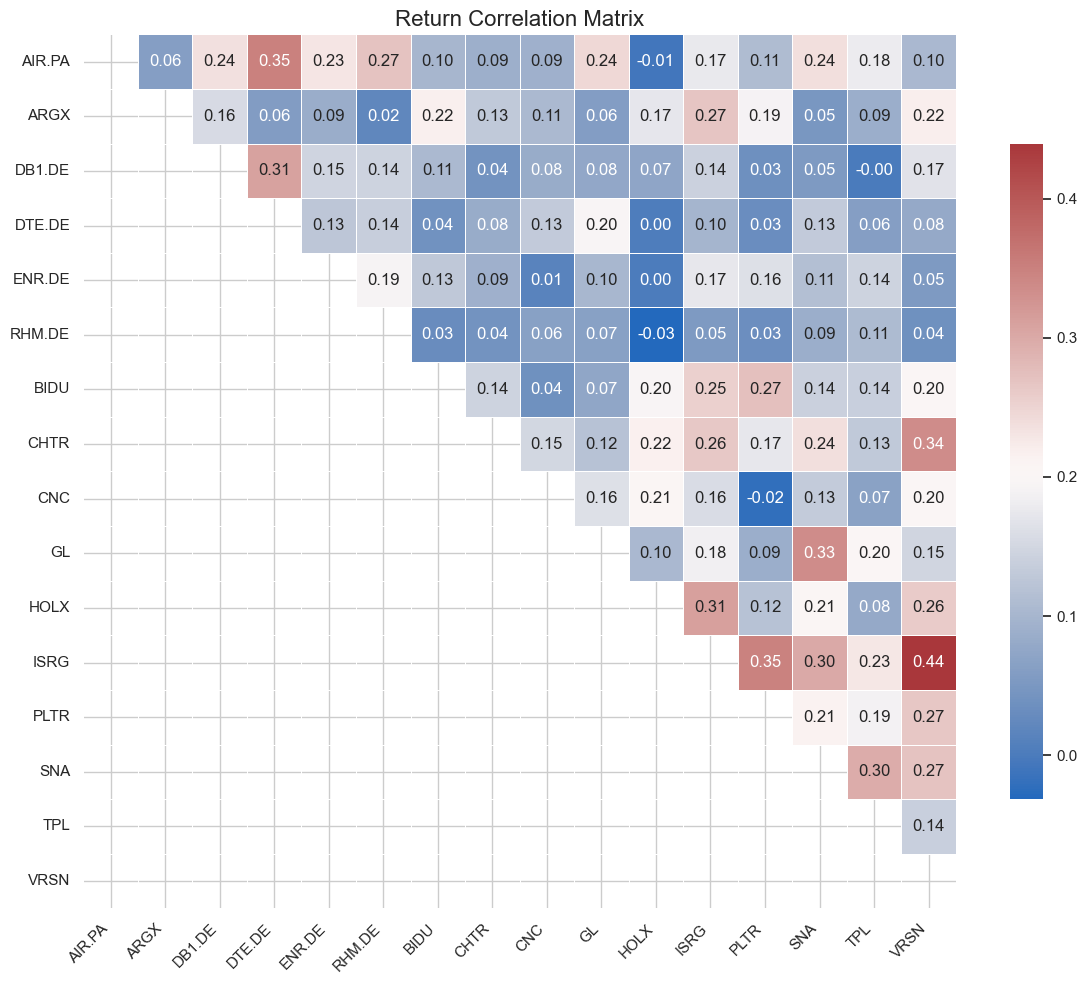

In [47]:
# Look at var-covar matrix
correlation_analysis(historic_prices)

                AIR.PA        ARGX      DB1.DE     DTE.DE     ENR.DE  \
Date                                                                   
2015-01-02   35.830936         NaN   46.329552   8.845660        NaN   
2015-01-05   35.938793         NaN   46.235729   8.573949        NaN   
2015-01-06   36.771469         NaN   46.016785   8.473316        NaN   
2015-01-07   37.729259         NaN   47.142769   8.714837        NaN   
2015-01-08   39.014950         NaN   48.479870   9.144205        NaN   
...                ...         ...         ...        ...        ...   
2025-08-13  179.559998  646.599976  254.500000  30.370001  98.480003   
2025-08-14  183.779999  652.429993  257.000000  30.650000  98.480003   
2025-08-15  186.880005  653.830017  256.200012  30.840000  94.839996   
2025-08-18  184.220001  661.320007  255.600006  31.080000  96.820000   
2025-08-19  183.839996  656.890015  254.899994  31.250000  94.480003   

                 RHM.DE        BIDU        CHTR        CNC     

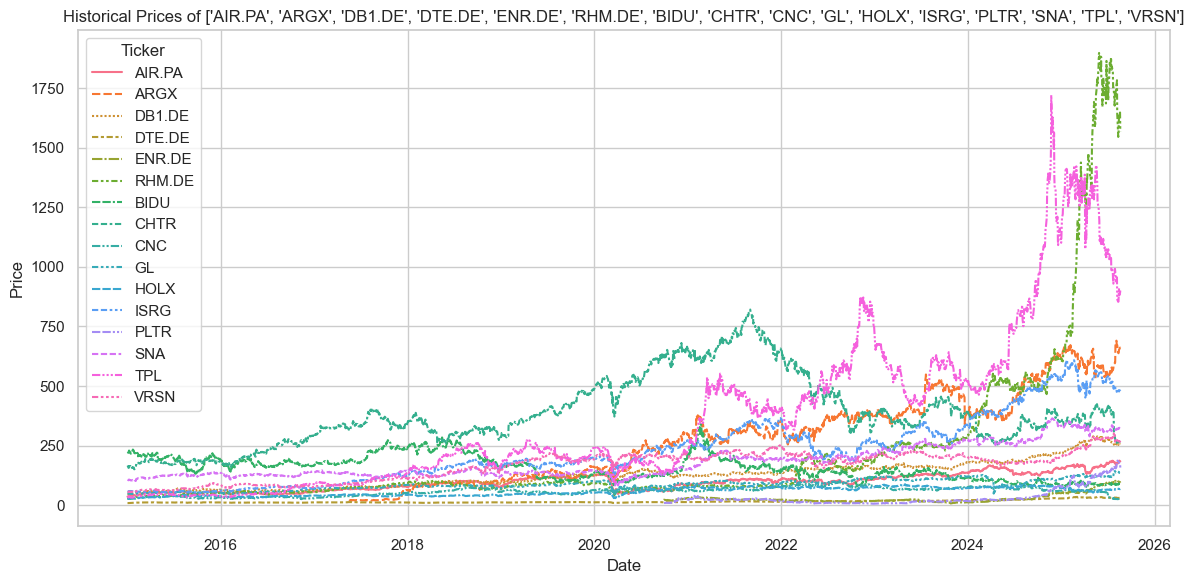

In [48]:
# Plot current - and historic prices of particular stocks on the basis of the asset tickers, assets desired to be plotted need to be in list format 
# If user wants to see historic prices in terminal, set show_prices = True
stocks_to_fetch = current_portfolio # For example index 0 and 1
plot_historical_prices(historic_prices, stocks_to_fetch, show_prices = True)

In [49]:
# Calculate corresponding portfolio weights using a specified method 
weights = portfolio.asset_allocation(method)

df = portfolio.display_portfolio(weights, method) # Automatically prints portfolio info



=========== Current Portfolio Characteristics on 20-08-2025 ===========

Portfolio Value after Purchase in USD: $6,435.39

                        sector asset class  quantity  purchase price   weight  \
AIR.PA             Industrials      EQUITY    3.0927      183.839996   3.0927   
ARGX                Healthcare      EQUITY    0.5151      656.890015   0.5151   
DB1.DE      Financial Services      EQUITY    1.0948      254.899994   1.0948   
DTE.DE  Communication Services      EQUITY    9.7055       31.250000   9.7055   
ENR.DE             Industrials      EQUITY    3.6055       94.480003   3.6055   
RHM.DE             Industrials      EQUITY    0.1739     1568.000000   0.1739   
BIDU    Communication Services      EQUITY    7.6673       89.070000   7.6673   
CHTR    Communication Services      EQUITY    0.7232      267.010010   0.7232   
CNC                 Healthcare      EQUITY    7.5068       29.330000   7.5068   
GL          Financial Services      EQUITY    2.3549      136.7700

## Simulate Portfolio paths over a one-year horizon using a GBM; calculate VaR and CVaR.

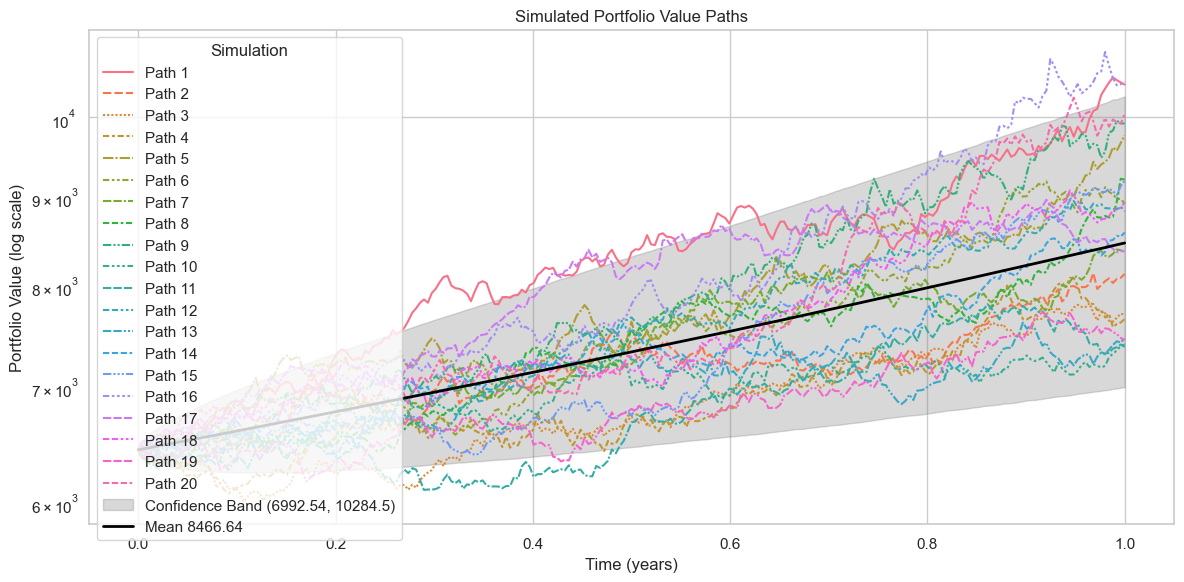

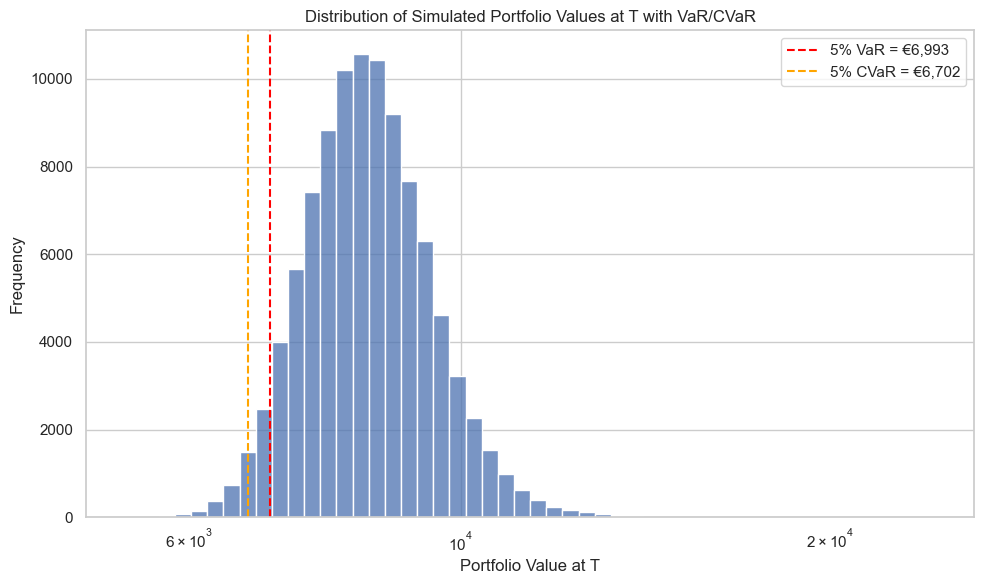

6435.386068772888
6349.547739287204
SCR: 1y 99.5% VaR = €86


In [50]:
# Simulate 100.000 portfolio paths and plot a number of the trajectories which can be specified by n_paths, for 1 year
t, port_paths = portfolio.simulate_portfolio_GBM(df, T, M)

# Trajectories are plotted in log-scale on y-axis because paths can explode
n_paths_to_plot = 20
plot_portfolio_trajectories(t, port_paths, n_paths = n_paths_to_plot)

# Demonstrate the impact of risk and uncertainty, plots distribution of terminal portfolio values including VaR/CVaR
histogram_uncertainty(port_paths)
# Further calculate the 1 year 99.5 VaR, this is the required buffer used in Solvency II to stay solvent in case of a rare event happening.
scr_1y = compute_solvency_capital_requirement(port_paths, days_per_year=252, alpha=99.5)
print(f"SCR: 1y 99.5% VaR = €{scr_1y:,.0f}")


## Simulate Portfolio paths over a one-month horizon using a GBM; calculate VaR and CVaR.

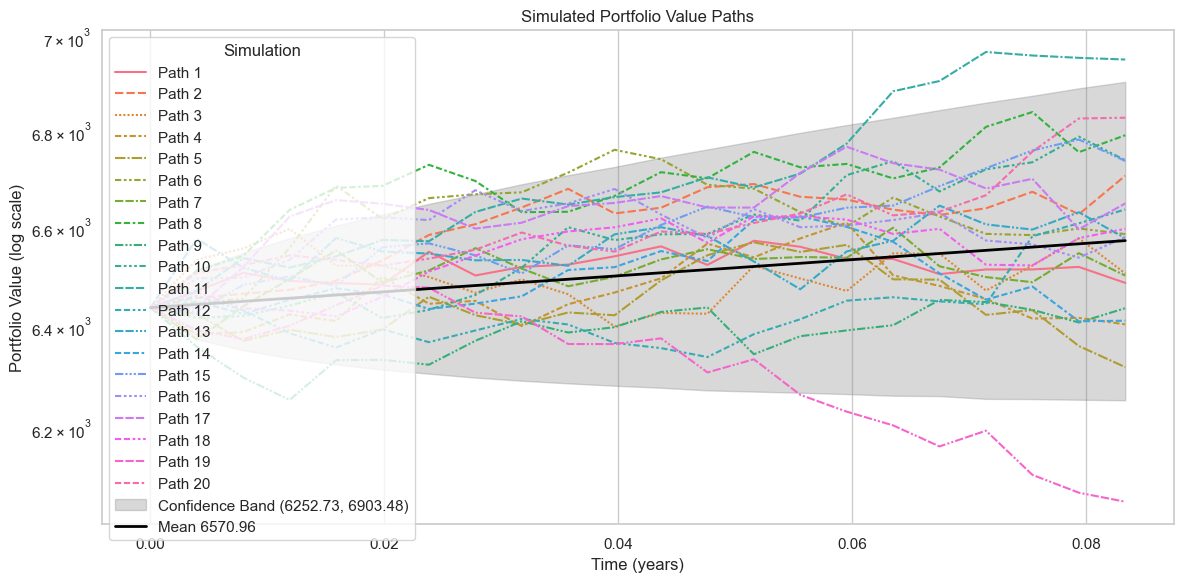

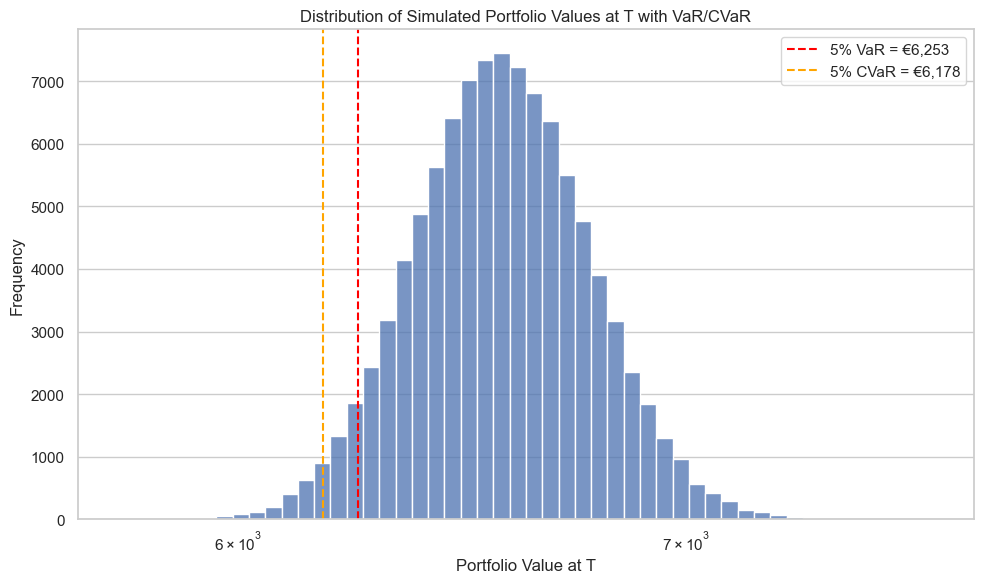

In [51]:
# Simulate 100.000 portfolio paths and plot a number of the trajectories which can be specified by n_paths, for 1 month
T=1/12
t, port_paths = portfolio.simulate_portfolio_GBM(df, T, M)

# Trajectories are plotted in log-scale on y-axis because paths can explode
n_paths_to_plot = 20
plot_portfolio_trajectories(t, port_paths, n_paths = n_paths_to_plot)

# Demonstrate the impact of risk and uncertainty, plots distribution of terminal portfolio values including VaR/CVaR
histogram_uncertainty(port_paths)

## Simulate Portfolio paths over a **one-year** horizon using a CorrelatedGBM by means of Cholesky decomposition; calculate VaR and CVaR.


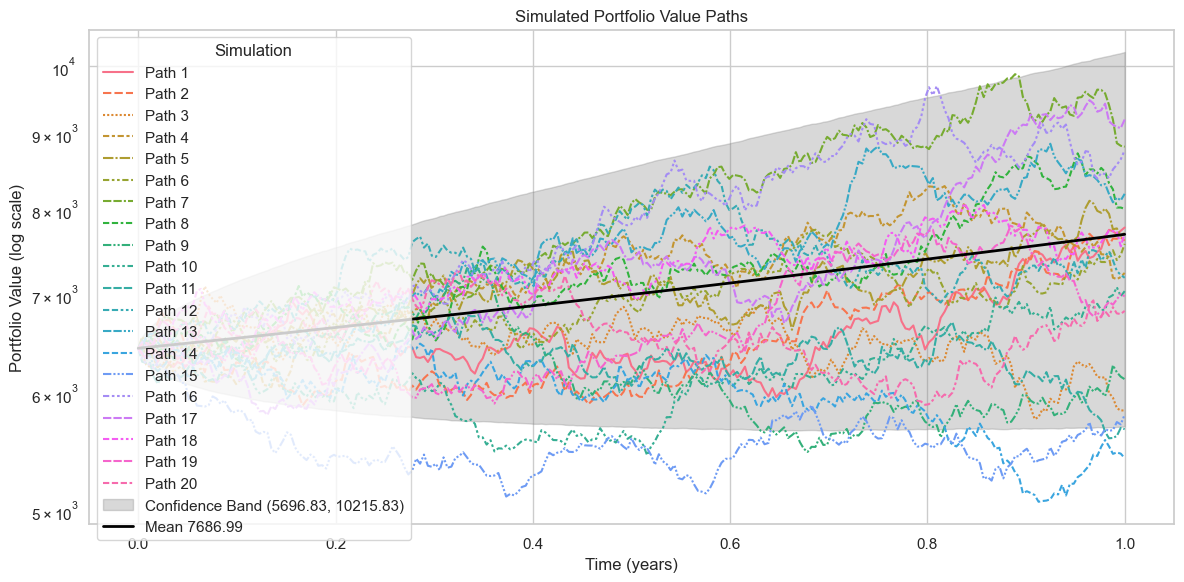

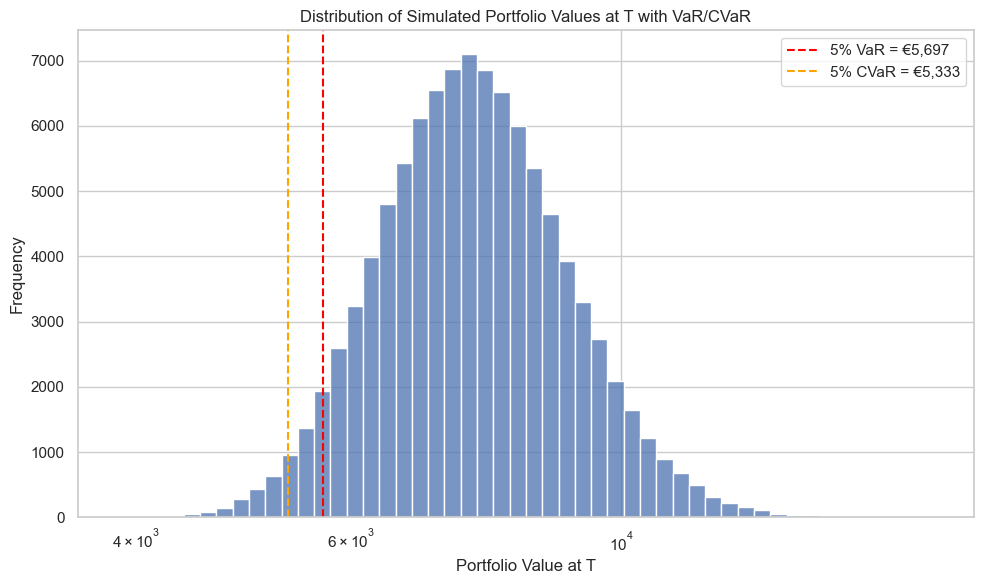

In [ ]:
t, port_paths = portfolio.simulate_portfolio_GBM_correlated(df, historic_prices, T=1, M=100000, N=252)

# Trajectories are plotted in log-scale on y-axis because paths can explode
n_paths_to_plot = 20
plot_portfolio_trajectories(t, port_paths, n_paths = n_paths_to_plot)

# Demonstrate the impact of risk and uncertainty, plots distribution of terminal portfolio values including VaR/CVaR
histogram_uncertainty(port_paths)

## Simulate Portfolio paths over a **one-month** horizon using a CorrelatedGBM by means of Cholesky decomposition; calculate VaR and CVaR.

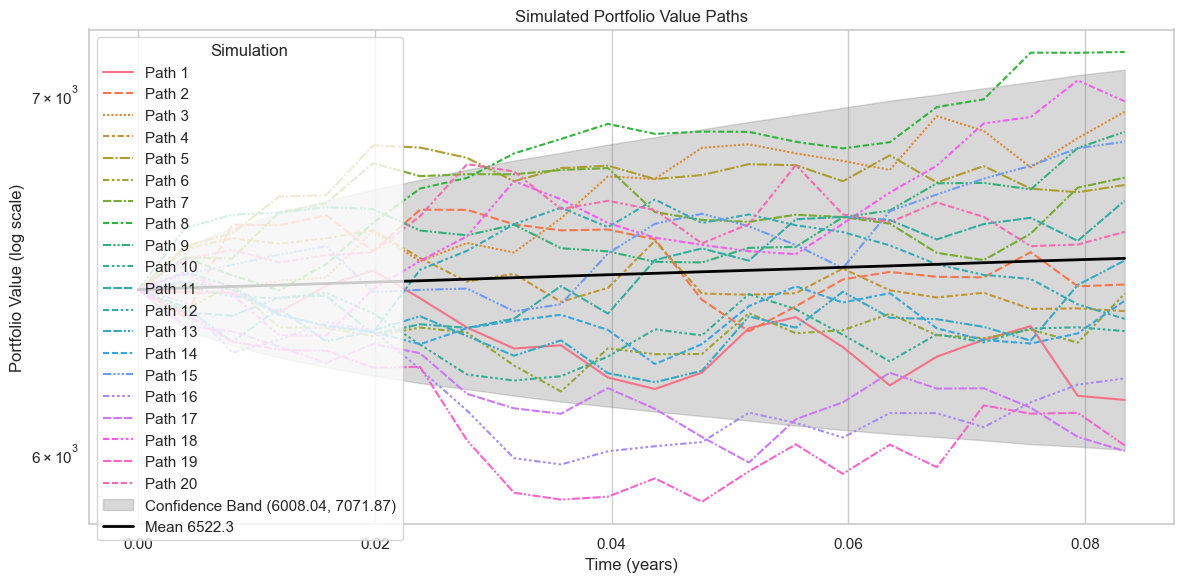

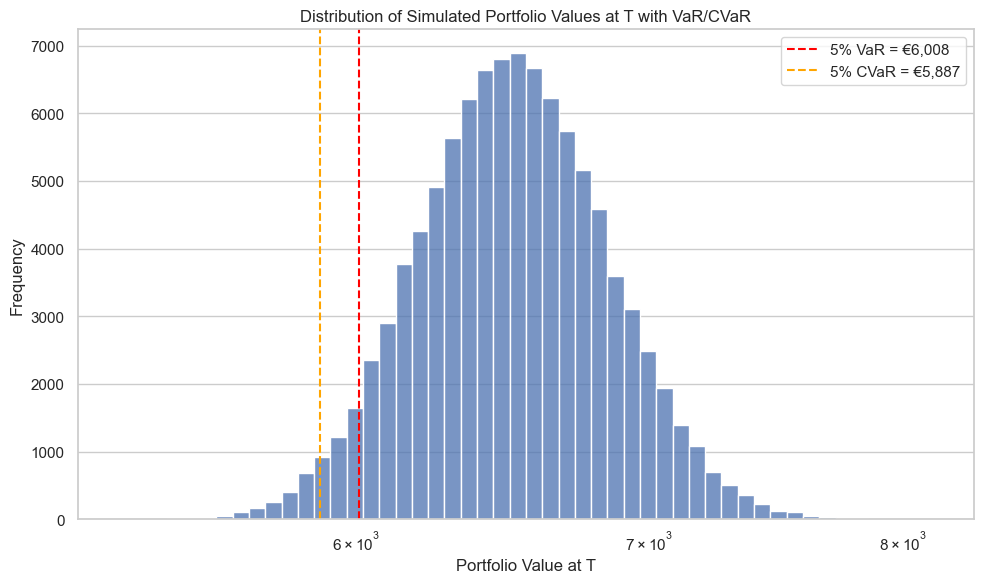

In [57]:
t, port_paths = portfolio.simulate_portfolio_GBM_correlated(df, historic_prices, T=1/12, M=100000, N=252)

# Trajectories are plotted in log-scale on y-axis because paths can explode
n_paths_to_plot = 20
plot_portfolio_trajectories(t, port_paths, n_paths = n_paths_to_plot)

# Demonstrate the impact of risk and uncertainty, plots distribution of terminal portfolio values including VaR/CVaR
histogram_uncertainty(port_paths)